# Prototyping: Building a foundation
****

# Introduction

For this prototype and in order to build a foundation and knowledge in Machine Learning. I will look to train a model using SVM on an example dataset of tweets that have details both a training and testing set which are pre-classified into hatred and non hatred. I will be following the "Universal workflow of Machine Learning" by Francoise Chollet detailed in Deep Learning with Python [1].

In this workflow he presents a universal blueprint to solve any machine learning problem.

My personal aim is to show proof-of-concept and that my project to train models is feasible and within scope. It is also to show my learning path given that my prior knowledge in Machine Learning and Python is nil. 
***

# Methodology

The universal workflow of Machine Learning is made up of seven different aspects: define the problem and assemble a dataset, choose a measure of success, decide on an evaluation protocol, prepare the data, develop a model that does better than the baseline, scale it up and regularise the model and tune the hyperparameters

For the sake of providing a protoype we will only cover briefly defining the problem and assembling the dataset (aspect 1), measuring the success (aspect 2), preparing the data (aspect 4) in order to train the model using built in SKLearn functions.

The implementation of my project will look at the other aspects such as developing a model that does better than the baseline.  

***

## Aspect 1

### Defining the problem

***

The input data for this prototype is called "Twitter Sentiment Analysis" from Kaggle provided by Ali Toosi [2]. It contains two .csv files, one for testing and the other for training. The testing data is two columns consisting of ID and the tweet. The traning data has the addition of label which describes if the given tweet is racist/sexist it does so by giving it the value of "0" or "1". 

This is a binary classification as when we train the model and use the test data the predictions will be either of value 0 or 1. Identifying this problem type means we can make suitable choices on the models architecture. 

### Assembling the dataset

First I will import pandas so we can import and read the train and test files.

In [1]:
import pandas as pd

# Training Data
train = pd.read_csv("train.csv")

# Test Data
test = pd.read_csv("test.csv")

Let's take a look at the count of the data in the training file to see how many tweets we have that are deemed racist/sexist and those that are not. 

We will also ensure there is no missing values in our dataset and view the first 5 rows.

In [2]:
print('Total number of tweets in the training data:', train['tweet'].count())
print('Total number of offensive tweets:', train["label"].sum())
print('Total number of non-offensive tweets:', len(train) - train["label"].sum())

train.isnull().sum()

Total number of tweets in the training data: 31962
Total number of offensive tweets: 2242
Total number of non-offensive tweets: 29720


id       0
label    0
tweet    0
dtype: int64

In [3]:
print('First 5 tweets:')
train.head()

First 5 tweets:


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


We can see that the entire length of the training data is 31,962. 2,242 tweets of which are considered offensive leaving 29,720 non-offensive. This should be a sufficient amount of data to train our model. 

## Aspect 2

### The measure of success
***

A binary classification problem finds it's accuracy to be a common metric for success.  Accuracy will measure the proportion of correct predictions and is most useful when the class distributions are balanced. This means that each class has equal important. 

Other metrics you could use are: confusion matrix, precision and recall, f1-score and area under the receiver operating characteristic curvee (au-roc).

## Aspect 4

### Preparing the data
***

In this section, I am preprocessing the raw tweet data. It's crucial to apply these methods to the data to ensure that the performance of the model is optimal and suitable for analysis.

We start with importing "re" for regular expressions and "nltk" (Natural Language Toolkit), which is a leading library for text preprocessing.

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Next we define stopwords such as "the", "is" and "in", these are often removed as they carry minimal meaningful information.

In [5]:
stop_words = set(stopwords.words('english'))

Next is creating and applying cleaning functions. 

These functions are lowercasing, removal of URLS, mentions, hashtags and punctuation. Finally, Tokenization and filtering the previously defined stopwords. 

In [6]:
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    return " ".join(filtered_words)

train['clean_tweet'] = train['tweet'].apply(clean_tweet)
test['clean_tweet'] = test['tweet'].apply(clean_tweet)

In [7]:
# Print the training dataset head to ensure clean_tweet has been added and processed correctly

train.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time urð ðððð ððð
4,5,0,factsguide: society now #motivation,factsguide society motivation


After preprocessing the tweets, the next step is to split the data into training and testing sets.
***
Below we import train_test_split from Scikit-learn, this allows us to simplify the process of spliting into sets.

We then execute the split with various parameters. These parameters are:

- **train.clean_tweet.values**: Passes through the clean tweets
- **y**: Our target labels
- **stratify=y**: By setting this we ensure the distribution of offensive and non-offensive tweets are consistent in both the training and testing sets.
- **random_state=1**: This is a seed for the random number generator. Using the same seed ensures that if we run the code again, we get the same split.
- **test_size=0.3**: This specifies that 30% of the data should be allocated for the test set, and the remaining 70% for the training set.
- **shuffle=True**: This shuffles the data before splitting, which is important for removing any inherent biases in the dataset order.

In [8]:
from sklearn.model_selection import train_test_split


y = train.label.values

x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)
     

Importing TF-IDF Vectorizer

TF = Term Frequency
IDF = Inverse Document Frequency

This will convert our text data into a format that the machine learning model can use. It helps in understanding the significance of the words in our dataset.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Only transform the test data
x_test_tfidf = tfidf_vectorizer.transform(x_test)



In [10]:
from sklearn.svm import SVC


svm_classifier = SVC(kernel='linear', probability=True)
prob = svm_classifier.fit(x_train_tfidf, y_train).predict_proba(x_test_tfidf)
y_pred_svm = svm_classifier.predict(x_test_tfidf)

In [11]:
from sklearn.metrics import classification_report as classr
print(classr(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8916
           1       0.90      0.52      0.66       673

    accuracy                           0.96      9589
   macro avg       0.93      0.76      0.82      9589
weighted avg       0.96      0.96      0.96      9589



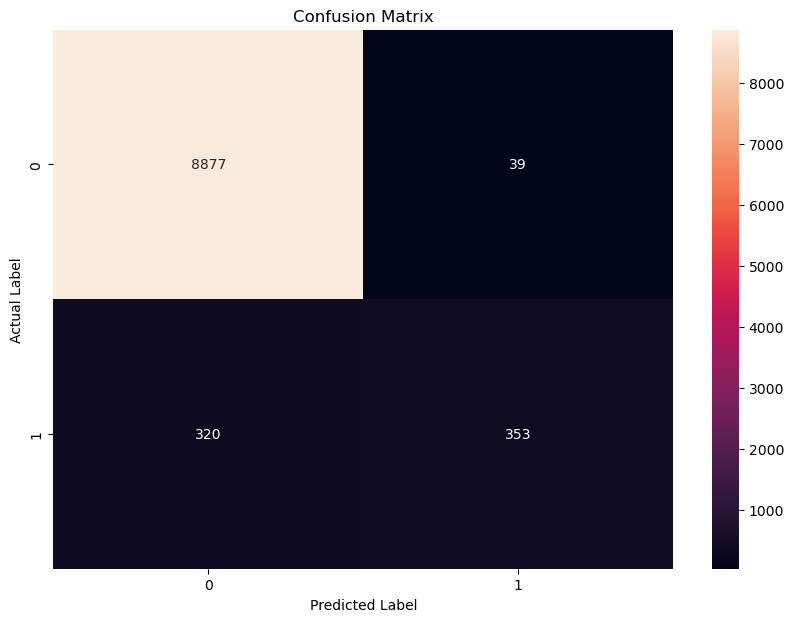

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## References

[1] Chollet, F., 2018. Deep learning with Python. 1st ed. Shelter Islands: Manning, pp.111-116.

[2] Toosi, A., 2018. Twitter Sentiment Analysis. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech [Accessed 2 December 2023].